In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, chi2, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
data = pd.read_csv(r"D:\Heart_Disease_Project\data\heart_disease_data_pca_results.csv")
X = data.drop(columns=['target'])
y = data['target']

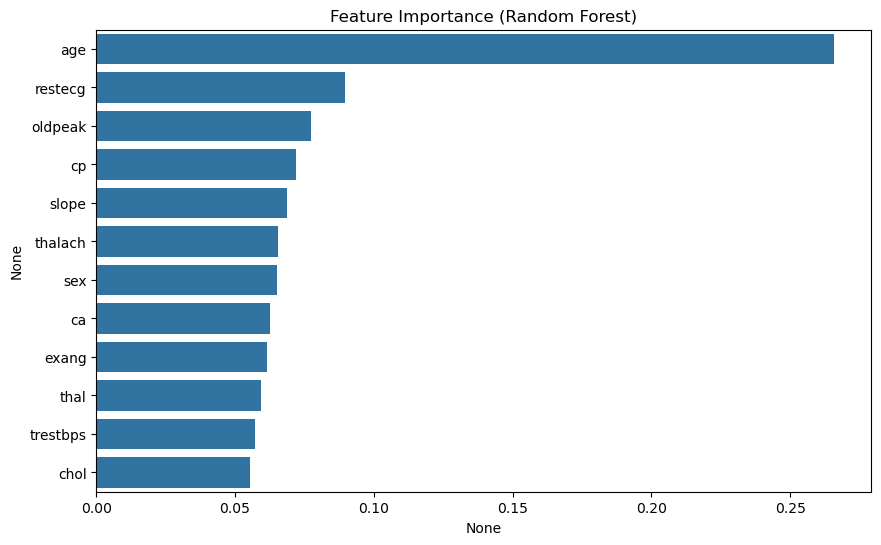

In [3]:
# 1. Feature Importance (Random Forest)
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
importances = rf.feature_importances_
feat_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_importances, y=feat_importances.index)
plt.title('Feature Importance (Random Forest)')
plt.show()

In [4]:
# 2. Recursive Feature Elimination (RFE)
rfe = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=5)
rfe.fit(X, y)
selected_rfe = X.columns[rfe.support_]
print("Top features selected by RFE:", list(selected_rfe))

Top features selected by RFE: ['age', 'cp', 'restecg', 'oldpeak', 'slope']


In [5]:
# 3. Chi-Square Test
# Scale features to [0,1] for chi2
X_minmax = MinMaxScaler().fit_transform(X)
chi2_selector = SelectKBest(chi2, k=5)
chi2_selector.fit(X_minmax, y)
selected_chi2 = X.columns[chi2_selector.get_support()]
print("Top features selected by Chi-Square Test:", list(selected_chi2))


Top features selected by Chi-Square Test: ['age', 'cp', 'trestbps', 'restecg', 'ca']


In [6]:
# 4. Select most relevant features (intersection of methods)
relevant_features = set(selected_rfe) | set(selected_chi2) | set(feat_importances.head(5).index)
print("Final selected features for modeling:", list(relevant_features))

Final selected features for modeling: ['trestbps', 'oldpeak', 'slope', 'ca', 'age', 'cp', 'restecg']


In [7]:
# make new DataFrame with selected features
X_selected = X[list(relevant_features)]

Heart_Disease_Data_Selected = pd.concat([X_selected, y], axis=1)
Heart_Disease_Data_Selected.to_csv(r"D:\Heart_Disease_Project\data\heart_disease_data_selected_features.csv", index=False)